In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Aditya Singh\Downloads\MRTSSM448USN.csv",parse_dates=True,index_col='DATE')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1992-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MRTSSM448USN  361 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [8]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

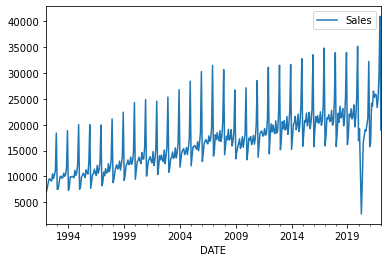

In [9]:
df.plot()

In [10]:
len(df)

361

In [11]:
len(df)-18

343

In [12]:
test_size = 18
test_ind = len(df) - test_size

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2020-03-01,10969
2020-04-01,2744
2020-05-01,8787


In [15]:
test

,Sales
DATE,
2020-08-01,18968
2020-09-01,18790
2020-10-01,20088
2020-11-01,21287
2020-12-01,32237
2021-01-01,15740
2021-02-01,16568
2021-03-01,24171
2021-04-01,23599


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scalar = MinMaxScaler()

In [18]:
scalar.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scalar.transform(train
                               )

In [20]:
scaled_test = scalar.transform(test
                               )

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
len(test)

18

In [23]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [24]:
X,y = generator[0]

In [28]:
len(X[0])

12

In [26]:
y

array([[0.14679295]])

In [27]:
scaled_train

array([[0.12939253],
       [0.14747169],
       [0.17681177],
       [0.20538056],
       [0.21022429],
       [0.19862401],
       [0.19618672],
       [0.23968778],
       [0.21068707],
       [0.23169716],
       [0.26048191],
       [0.48286181],
       [0.14679295],
       [0.14747169],
       [0.18578965],
       [0.2197575 ],
       [0.22580446],
       [0.21259988],
       [0.21750532],
       [0.24323574],
       [0.22426187],
       [0.23453553],
       [0.27816   ],
       [0.49693024],
       [0.13994385],
       [0.15913368],
       [0.2214235 ],
       [0.21981921],
       [0.22413846],
       [0.22055965],
       [0.21568506],
       [0.25955635],
       [0.23055564],
       [0.24638262],
       [0.29648598],
       [0.53287261],
       [0.14728658],
       [0.16095394],
       [0.21815321],
       [0.2290439 ],
       [0.24298892],
       [0.23314719],
       [0.2171968 ],
       [0.2628575 ],
       [0.24576559],
       [0.23740475],
       [0.30873415],
       [0.532

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
n_features = 1

In [31]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [50]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [53]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
 10/331 [..............................] - ETA: 1s - loss: 0.0047    

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25556/3502985036.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


331/331 [==============================] - 2s 6ms/step - loss: 0.0028 - val_loss: 0.0341
Epoch 2/20
331/331 [==============================] - 2s 6ms/step - loss: 0.0028 - val_loss: 0.0687
Epoch 3/20
331/331 [==============================] - 2s 6ms/step - loss: 0.0026 - val_loss: 0.0281
Epoch 4/20
331/331 [==============================] - 2s 6ms/step - loss: 0.0025 - val_loss: 0.0320
Epoch 5/20
331/331 [==============================] - 2s 6ms/step - loss: 0.0024 - val_loss: 0.0247
Epoch 6/20
331/331 [==============================] - 2s 6ms/step - loss: 0.0024 - val_loss: 0.0283
Epoch 7/20
331/331 [==============================] - 2s 6ms/step - loss: 0.0022 - val_loss: 0.0348


In [54]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

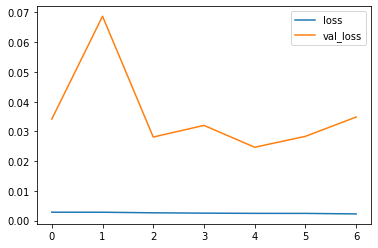

In [55]:
losses.plot()

In [56]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [57]:
true_predictions=scalar.inverse_transform(test_predictions)

In [58]:
test['Predictions'] =true_predictions

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25556/4217253912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] =true_predictions


In [59]:
test

,Sales,Predictions
DATE,,
2020-08-01,18968,22781.867426
2020-09-01,18790,21643.653904
2020-10-01,20088,23485.854349
2020-11-01,21287,27509.019567
2020-12-01,32237,37270.759427
2021-01-01,15740,18501.780762
2021-02-01,16568,19037.909840
2021-03-01,24171,13000.348105
2021-04-01,23599,11498.883559


<AxesSubplot:xlabel='DATE'>

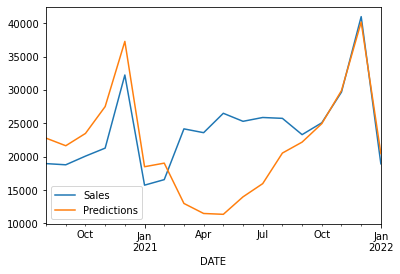

In [60]:
test.plot()

In [61]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [62]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [63]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)


Epoch 1/8


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_25556/2403673229.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


349/349 [==============================] - 5s 11ms/step - loss: 0.0180
Epoch 2/8
349/349 [==============================] - 3s 9ms/step - loss: 0.0127
Epoch 3/8
349/349 [==============================] - 4s 10ms/step - loss: 0.0102
Epoch 4/8
349/349 [==============================] - 3s 10ms/step - loss: 0.0067
Epoch 5/8
349/349 [==============================] - 4s 10ms/step - loss: 0.0063
Epoch 6/8
349/349 [==============================] - 4s 12ms/step - loss: 0.0049
Epoch 7/8
349/349 [==============================] - 3s 9ms/step - loss: 0.0046
Epoch 8/8
349/349 [==============================] - 3s 8ms/step - loss: 0.0048


In [64]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [66]:
forecast = scalar.inverse_transform(forecast)

In [67]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2021-09-01,23306
2021-10-01,25080
2021-11-01,29679


In [68]:
forecast

array([[17188.89921749],
       [20761.56102747],
       [20907.69295466],
       [23163.12340057],
       [22660.2927106 ],
       [23158.98319882],
       [23088.31383824],
       [21371.21587759],
       [22510.93440127],
       [26802.95964581],
       [40495.20573378],
       [18335.77277485]])

In [69]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [70]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [71]:
forecast_df

,Forecast
2019-11-01,17188.899217
2019-12-01,20761.561027
2020-01-01,20907.692955
2020-02-01,23163.123401
2020-03-01,22660.292711
2020-04-01,23158.983199
2020-05-01,23088.313838
2020-06-01,21371.215878
2020-07-01,22510.934401
2020-08-01,26802.959646


<AxesSubplot:>

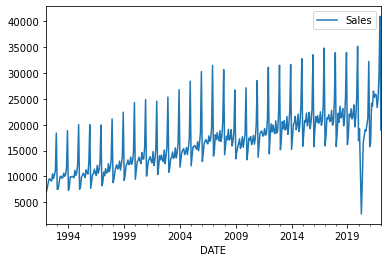

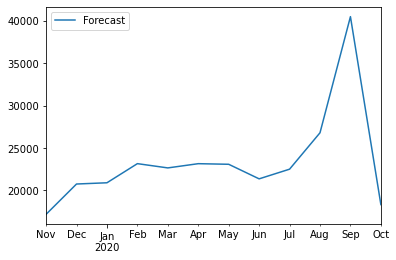

In [72]:
df.plot()
forecast_df.plot()

<AxesSubplot:xlabel='DATE'>

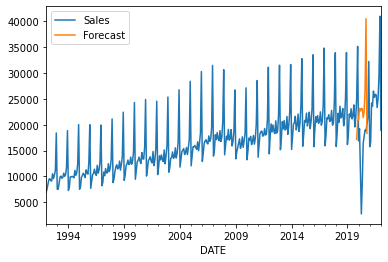

In [73]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

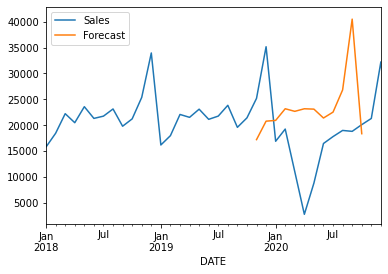

In [74]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')